In [9]:
import torch 
import numpy as np
import pinocchio as pin
import matplotlib.pyplot as plt

from wrapper_panda import PandaWrapper
from param_parsers import ParamParser


RuntimeError: 'widget is not a recognised GUI loop or backend name

In [3]:
data = torch.load('trajectories_10.pt', weights_only=True)


In [4]:
for d in data:
    print(d[1].size())

torch.Size([14, 7])
torch.Size([14, 7])
torch.Size([14, 7])
torch.Size([14, 7])
torch.Size([14, 7])
torch.Size([14, 7])
torch.Size([14, 7])
torch.Size([14, 7])
torch.Size([14, 7])


In [5]:

### Filling the lists of trajectories

targ_list = []
traj_list = []
for d in data:
    targ = d[0][:3]
    q0 = d[0][3:].reshape(1, 7)
    traj =torch.cat((q0, d[1]))
    targ_list.append(targ)
    traj_list.append(traj)
    

In [6]:
### Creating the robot models and scenes

robot_wrapper = PandaWrapper(capsule=False)
rmodel, cmodel, vmodel = robot_wrapper()

yaml_path = "scenes.yaml"
pp = ParamParser(yaml_path, 1)
cmodel = pp.add_collisions(rmodel, cmodel)

rdata = rmodel.createData()
cdata = cmodel.createData()


68


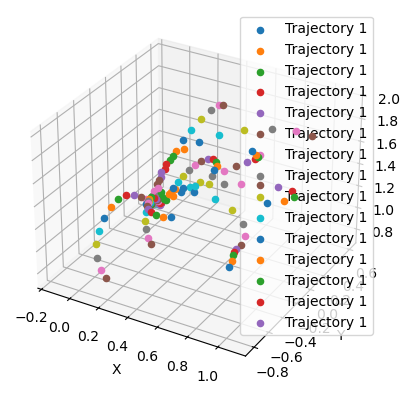

In [7]:
from mpl_toolkits.mplot3d import Axes3D
### Plotting the position of the end effector for each trajectory

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i, traj in enumerate(traj_list):
    for q in traj:
        pin.forwardKinematics(rmodel, rdata, q.numpy())
        pin.updateFramePlacements(rmodel, rdata)
        pos = rdata.oMf[rmodel.getFrameId("panda2_hand_tcp")].translation
        ax.scatter(pos[0], pos[1], pos[2], label=f'Trajectory {i+1}' if i == 0 else "")

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.legend()
plt.show()
